In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
# for the style of the graphs
plt.style.use('ggplot')
# to see all columns
pd.set_option("display.max_columns", 200)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
coasters = pd.read_csv("coaster_db.csv")
df = coasters.copy()
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

1087 gözlem , 56 özellik bulunuyor. Özelliklerin bazıları neredeyse tamamen eksik. Object tipte çok fazla sütun mevcut. 

kolonlarda bulunan verilerin ne olduklarını anlamak kolay çünkü çünkü veriyi kaggle dan aldım. anlayamıyorsak chatGPT ye selam vereceğiz.

veriye ilk bakış önemli tabii istatistiksel özelliklerine de bakabiliriz.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inversions,932.0,1.547210,2.114073,0.0000,0.00000,0.0000,3.0000,14.0000
year_introduced,1087.0,1994.986201,23.475248,1884.0000,1989.00000,2000.0000,2010.0000,2022.0000
latitude,812.0,38.373484,15.516596,-48.2617,35.03105,40.2898,44.7996,63.2309
longitude,812.0,-41.595373,72.285227,-123.0357,-84.55220,-76.6536,2.7781,153.4265
speed1_value,937.0,53.850374,23.385518,5.0000,40.00000,50.0000,63.0000,240.0000
speed_mph,937.0,48.617289,16.678031,5.0000,37.30000,49.7000,58.0000,149.1000
height_value,965.0,89.575171,136.246444,4.0000,44.00000,79.0000,113.0000,3937.0000
height_ft,171.0,101.996491,67.329092,13.1000,51.80000,91.2000,131.2000,377.3000
Inversions_clean,1087.0,1.326587,2.030854,0.0000,0.00000,0.0000,2.0000,14.0000
Gforce_clean,362.0,3.824006,0.989998,0.8000,3.40000,4.0000,4.5000,12.0000


Bu aşamadan sonra eksik değerler , tekrarlı veriler , aykırı değerler , çöp denilebilecek veriler ile ilgilenmek gerekiyor.

Bazı sütunların veri tipleri içerdikleri veriler için uygun değilse onu düzeltmek, gerekli görülen durumlarda yeni özelikler türetmek gibi şeyler var.

Veri hazırlama aşaması aşağıdaki adımlar olarak düşünüleiblir.
* Dropping irrelevant columns and rows --> veri setiyle alakasız sütun ve satırları silme.
* Identifying duplicated columns --> Aynı bilgiyi veren kolonları tespit etmek.
* Renaming Columns --> Kolonların gerekirse yeniden isilendirilmesi.
* Feature Creation --> Elimizdeki özelliklerden eğer farklı bilgiler çıkarabiliyorsak yeni sütunlar üretmek.

In [6]:
# eksik değerlere bakalım.
eksik_df = pd.DataFrame()
for col in df.columns :
    if df[col].isna().any() == 1 :
        eksik_df

In [7]:
eksik_yuzde  = (df.isna().sum() / len(df)) * 100 

eksik_df = pd.DataFrame(eksik_yuzde, columns=["eksik_değer_yüzdesi"])

In [8]:
eksik_df

,eksik_değer_yüzdesi
coaster_name,0.000000
Length,12.327507
Speed,13.799448
Location,0.000000
Status,19.595216
Opening date,22.999080
Type,0.000000
Manufacturer,5.427783
Height restriction,23.551058
Model,31.554738


Eksik değer yüzdesi 50% yi geçenleri silmek mantıklı bir yöntem olarak değerlendirilebilir. Bunu gerekli gereksiz düşünmeden her veri setinde en başta yapıyorum, önemli çünkü

In [9]:
eksikler = list(eksik_df[eksik_df["eksik_değer_yüzdesi"] > 50].index)

In [10]:
df.drop(columns=eksikler , axis=1 , inplace=True)

In [11]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Trains', 'Duration', 'Capacity',
       'Designer', 'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'Inversions_clean'],
      dtype='object')

Gereksiz olduğunu düşündüğü sütunları bırakarak df i yeniden tanımlayayaım şimdi de. İsteğe göre bu işlem de drop ile yapılabilir.

In [12]:
df = df[['coaster_name',
         # 'Length', 'Speed',
         'Location', 'Status',
         # 'Opening date',
       # 'Type',
         'Manufacturer',
         # 'Height restriction', 'Model',
         'Height',
       # 'Inversions', 'Lift/launch system', 'Trains', 'Duration', 'Capacity',
       # 'Designer',
         'year_introduced',
         'latitude', 'longitude', 'Type_Main',
       'opening_date_clean',
         # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph',
         # 'height_value', 'height_unit',
         'Inversions_clean']]

bir df in veya bir df e ait bir subset üzerinde çalışacaksan önce copy() metoduyla yedeklemek önemli olabilir.

In [13]:
df.head()

,coaster_name,Location,Status,Manufacturer,Height,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,Inversions_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,50 ft (15 m),1884,40.5740,-73.9780,Wood,1884-06-16,6.0,0
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,1
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,0
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,1
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,1


Elimde kalan feature ların istatistiksel bilgilerine bakıyorum :
geneli standart sapması yüksek dağınık veriler , Çarpıklık olabileceğini daha şimdiden anlayabilirim.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_introduced,1087.0,1994.986201,23.475248,1884.0000,1989.00000,2000.0000,2010.0000,2022.0000
latitude,812.0,38.373484,15.516596,-48.2617,35.03105,40.2898,44.7996,63.2309
longitude,812.0,-41.595373,72.285227,-123.0357,-84.55220,-76.6536,2.7781,153.4265
speed_mph,937.0,48.617289,16.678031,5.0000,37.30000,49.7000,58.0000,149.1000
Inversions_clean,1087.0,1.326587,2.030854,0.0000,0.00000,0.0000,2.0000,14.0000


In [15]:
df.describe(include=["object","category"]).T

,count,unique,top,freq
coaster_name,1087,990,Batman: The Ride,7
Location,1087,280,Other,250
Status,874,15,Operating,668
Manufacturer,1028,102,Vekoma,135
Height,965,382,70 ft (21 m),20
Type_Main,1087,3,Steel,816
opening_date_clean,837,602,1999-01-01,10


Özelliklerin tiplerinin tuttukları verilerle ne kadar uyumlu olduğunu kontrol etmek gerekiyor :
opening_date_clean datetime tipinde olursa çok daha güzel olur şu anda object tipte , veya bu sütundaki verileri parçalayıp gün , ay , yıl şeklinde yeni sütunlara verebiliriz.

tip dönüştürmek için astype() kullanılabilir , veya to_int , to_string gibi fonksiyonlar var onları da kullanabiliyorm.

In [16]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
Height                 object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
Inversions_clean        int64
dtype: object

In [17]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [18]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'Height',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed_mph', 'Inversions_clean'],
      dtype='object')

In [20]:
df = df.rename(columns={'coaster_name' :"isim" ,
                        'Location': "yer", 
                        'Status': "durum",
                        'Manufacturer' : "uretic_sirket",
                        'year_introduced' : "uretim_yili",
                        'latitude' : "enlem",
                        'longitude' : "boylam",
                        'Type_Main' : "ana_tip",
                        'opening_date_clean' : "acilis_tarihi",
                        'speed_mph' : "max_hız(mph)",
                        'Inversions_clean' : "devrimler" ,
                        'Height' : "yukseklik"
                       })

In [21]:
df.loc[df.duplicated()]


,isim,yer,durum,uretic_sirket,yukseklik,uretim_yili,enlem,boylam,ana_tip,acilis_tarihi,max_hız(mph),devrimler


tamamı tekrarlayan kayıt yok tabii ki . 
Bir de isim,yer  ve açılı tarihine göre bakalım ki aynı roller coaster tekrar girilmiş mi kontrol edelim.

In [22]:
df.loc[df.duplicated(subset=['isim','yer','acilis_tarihi'])]

,isim,yer,durum,uretic_sirket,yukseklik,uretim_yili,enlem,boylam,ana_tip,acilis_tarihi,max_hız(mph),devrimler
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,96 ft (29 m),1927,42.8617,-79.0598,Wood,1926-01-01,60.0,0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,NaN,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,0
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,77 ft (23 m),1938,41.6349,-80.3180,Wood,1938-05-23,50.0,0
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,104 ft (32 m),1980,NaN,NaN,Steel,NaT,35.0,0
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,10 m (33 ft),1986,43.8427,-79.5423,Steel,1981-05-23,39.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,13 ft (4.0 m),2021,40.1343,-74.4434,Steel,1999-01-01,NaN,0
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,NaN,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,0
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,206 ft (63 m),2022,28.0339,-82.4231,Steel,NaT,76.0,2
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,111 ft (34 m),2022,NaN,NaN,Steel,NaT,53.0,3


In [23]:
df.drop_duplicates(subset=['isim','yer','acilis_tarihi'] , keep="first" , inplace=True)
# tespit edilen tekrarlı kayıtlardan sadece ilk girilen tutulacak kalanlar silinecek.

In [24]:
# tekrar kontrol edelim : 
df.loc[df.duplicated(subset=['isim'])]

,isim,yer,durum,uretic_sirket,yukseklik,uretim_yili,enlem,boylam,ana_tip,acilis_tarihi,max_hız(mph),devrimler


In [25]:
df.shape
# en son elimizde kalan veri seti bu şekilde.

(990, 12)

Bundan sonra özellikleri birbirleriyle karşılaştırmaya başlayabiliriz. Görselleştirme bu aşmada işe yarıyor.

In [26]:
df["uretim_yili"].value_counts()

uretim_yili
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

hepsine değil de ilk 20 tanesine bakalım, en çok tren üretilen 20 yılı görselleştirmek istersek :

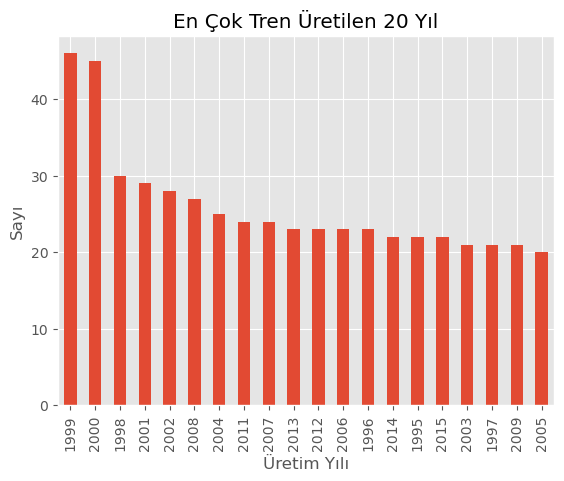

In [27]:
fig = df["uretim_yili"].value_counts().head(20).plot(kind= "bar" , title= "En Çok Tren Üretilen 20 Yıl")
fig.set_xlabel("Üretim Yılı")
fig.set_ylabel("Sayı");

ggplot güzel stil.

Text(0.5, 1.0, 'Speed Distribution By Main Type')

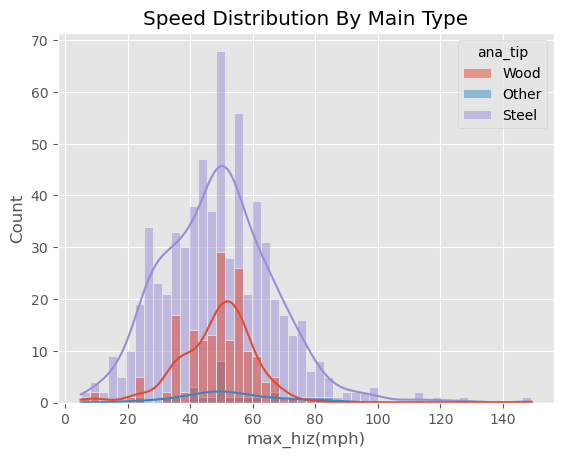

In [28]:
sns.histplot(data = df , x=df["max_hız(mph)"] , kde=True  ,bins= 50 , hue = "ana_tip") # kde default olarak False olur ,
# darklı kategorilere göre dağılıma da hue parametresi yardımıyla bakabiliyoruz.
plt.title("Speed Distribution By Main Type")

Text(0.5, 1.0, 'Speed Distribution By Main Type-KDE')

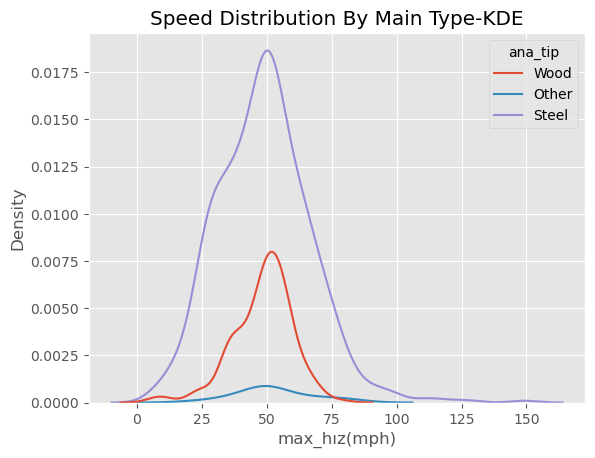

In [29]:
sns.kdeplot(data = df , x=df["max_hız(mph)"] , hue = "ana_tip") 
# histogramdaki kernel density estimation ı tek başına görmek için kdeplot. "Sade" olsun diyenlere...
plt.title("Speed Distribution By Main Type-KDE")

In [30]:
df.dtypes

isim                     object
yer                      object
durum                    object
uretic_sirket            object
yukseklik                object
uretim_yili               int64
enlem                   float64
boylam                  float64
ana_tip                  object
acilis_tarihi    datetime64[ns]
max_hız(mph)            float64
devrimler                 int64
dtype: object

Text(0.5, 1.0, 'Inversions Distribution By Main Type')

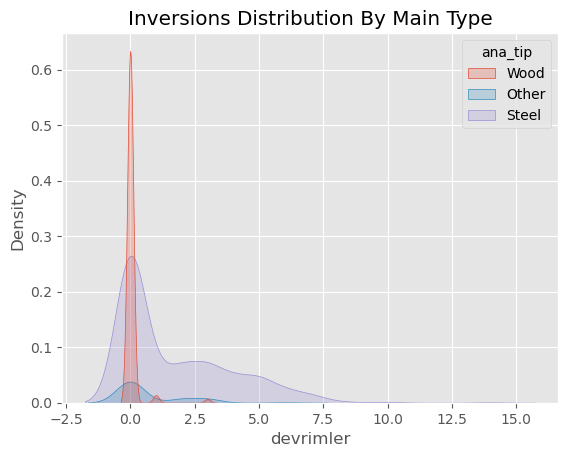

In [31]:
sns.kdeplot(data = df , x=df["devrimler"] , hue = "ana_tip" , fill=True) # fill ile eğrinin altı doldurulur.
# devrim dediğim yukarı aşağı yaptığı hareket , tahta , demir ve farklı malzemelerden yapılanların devrimleri değişebiliyor.
plt.title("Inversions Distribution By Main Type")

Text(0, 0.5, 'Üretici Şirketin Adı')

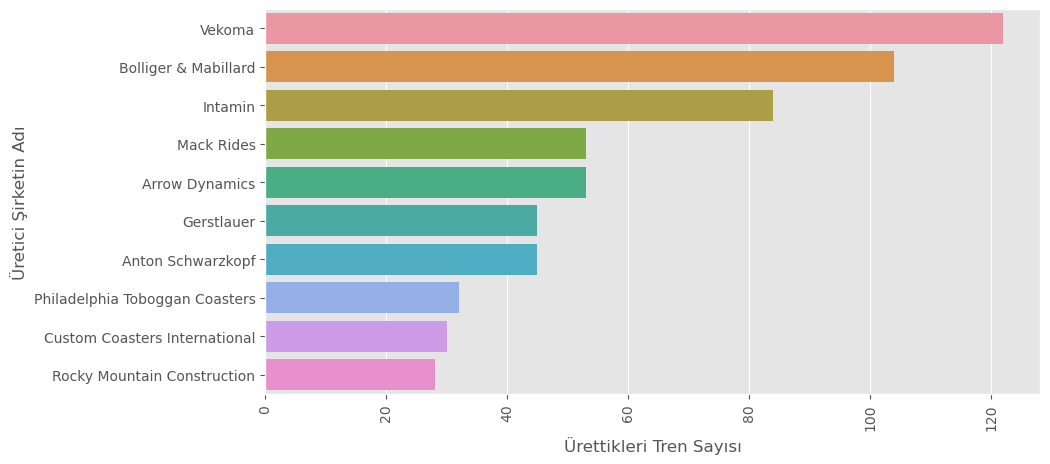

In [32]:
plt.figure(figsize=((10,5)))
most_manufacturers = df["uretic_sirket"].value_counts().head(10)
sns.barplot(y=most_manufacturers.index, x=most_manufacturers.values)
plt.xticks(rotation=90);
plt.xlabel("Ürettikleri Tren Sayısı")
plt.ylabel("Üretici Şirketin Adı")

Yukarıda sadece bir değişkeni inceledim , Univariate analysis denileiblir buna. Tabii farklı kategorilere göre de baktım ama yine de temel olarak 1 değişken incelendi.

Bivariate analysis var bir de 
    --> iki değişkeni karşılaştırarak birbirlerine göre durumlarını inceleyebiliyoruz.
Multivariate Analysis var -> korelasyon , heatmap direkt. ikiden fazla değişkeni inceliyoruz yani.

pairplot , heatmap, scatterplot , gibi grafikler bu konu başlıklarıda bulunuyor.

In [33]:
df.dtypes

isim                     object
yer                      object
durum                    object
uretic_sirket            object
yukseklik                object
uretim_yili               int64
enlem                   float64
boylam                  float64
ana_tip                  object
acilis_tarihi    datetime64[ns]
max_hız(mph)            float64
devrimler                 int64
dtype: object

(<Axes: xlabel='max_hız(mph)', ylabel='yukseklik'>,)

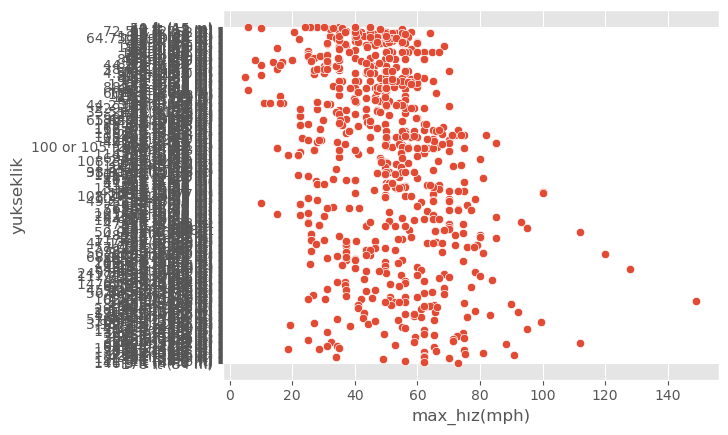

In [57]:
sns.scatterplot(data = df , x = "max_hız(mph)" , y = df["yukseklik"]) , # bu özelliği atlamışım en başta sonradan ekledim o yüzden karıştı... 

In [37]:
df["yukseklik"].value_counts()

yukseklik
70 ft (21 m)         19
100 ft (30 m)        16
150 ft (46 m)        15
95 ft (29 m)         15
56 ft (17 m)         14
                     ..
56.9 ft (17.3 m)      1
202 ft (62 m)         1
163 ft (50 m)         1
101.5 ft (30.9 m)     1
178 ft (54 m)         1
Name: count, Length: 382, dtype: int64

In [42]:
hız_degeri = df["yukseklik"].str.split("(",expand=True)[0]

In [46]:
hız = hız_degeri.str.split(" " , expand= True , n = 1 )

In [54]:
height = hız.dropna(subset = 0)[0] # hız değil yükseklik !!

In [73]:
height = height[~height.str.contains(',')]

In [77]:
height = pd.to_numeric(height)

In [78]:
height = round(height)

In [80]:
height = height.astype(int)

In [103]:
# burada biraz tekrar yapmak istedim sadece :)
df.columns

Index(['isim', 'yer', 'durum', 'uretic_sirket', 'uretim_yili', 'enlem',
       'boylam', 'ana_tip', 'acilis_tarihi', 'max_hız(mph)', 'devrimler',
       'height'],
      dtype='object')

In [93]:
df["height"] = height # bundan sonra yukseklik sütunu silinebilir aslında

<Axes: xlabel='height', ylabel='Density'>

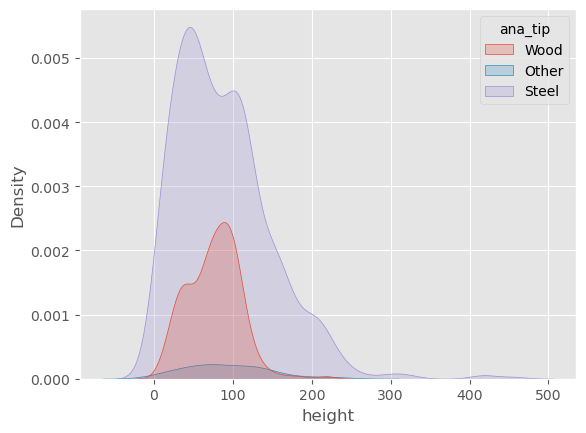

In [105]:
sns.kdeplot(data = df , x = df["height"] , fill=True , hue = "ana_tip")

Text(0.5, 1.0, 'Coaster Speed vs. Height')

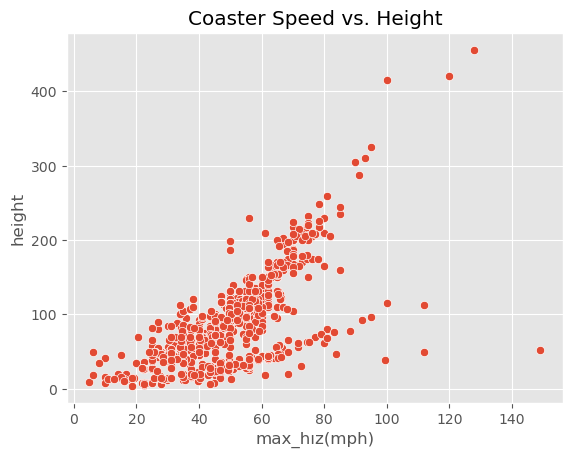

In [107]:
sns.scatterplot(data = df , x = "max_hız(mph)" , y = df["height"])
plt.title('Coaster Speed vs. Height')

<Axes: xlabel='max_hız(mph)', ylabel='height'>

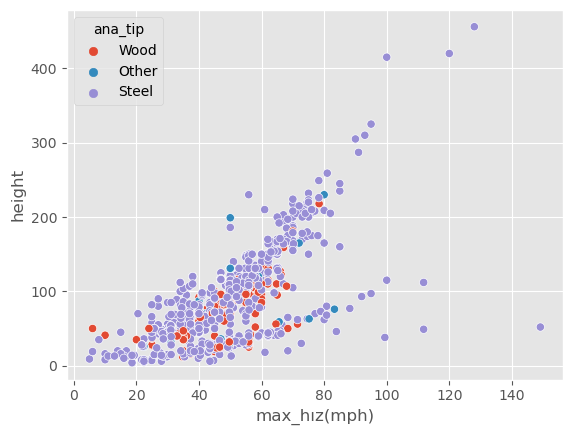

In [109]:
sns.scatterplot(data = df , x = "max_hız(mph)" , y = df["height"] , hue = "ana_tip") 
# yapıldığı malzemeye göre kayıtları ayırdım.

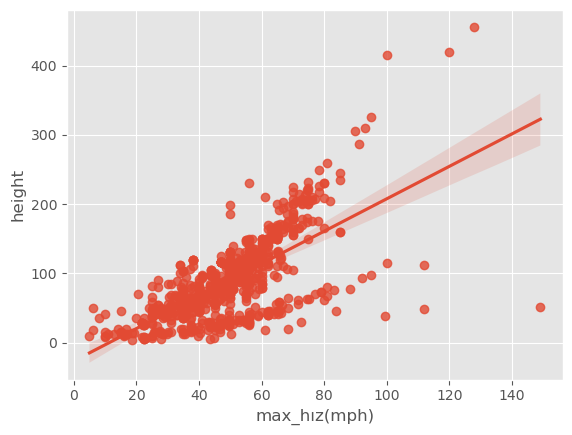

In [115]:
sns.regplot(data = df , x = "max_hız(mph)" , y = df["height"]); # bu da regresyon eğrisi grafiği.

Text(0.5, 1.0, 'Coaster Speed vs. Height')

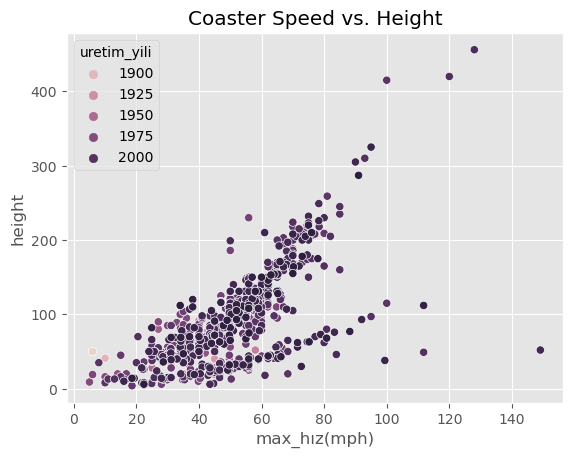

In [129]:
ax = sns.scatterplot(x="max_hız(mph)",
                y='height',
                hue='uretim_yili',
                data=df)
ax.set_title('Coaster Speed vs. Height')

pairplot tüm değişkenleri birbirleriyle karşılaştırmak için kullanılabilir :

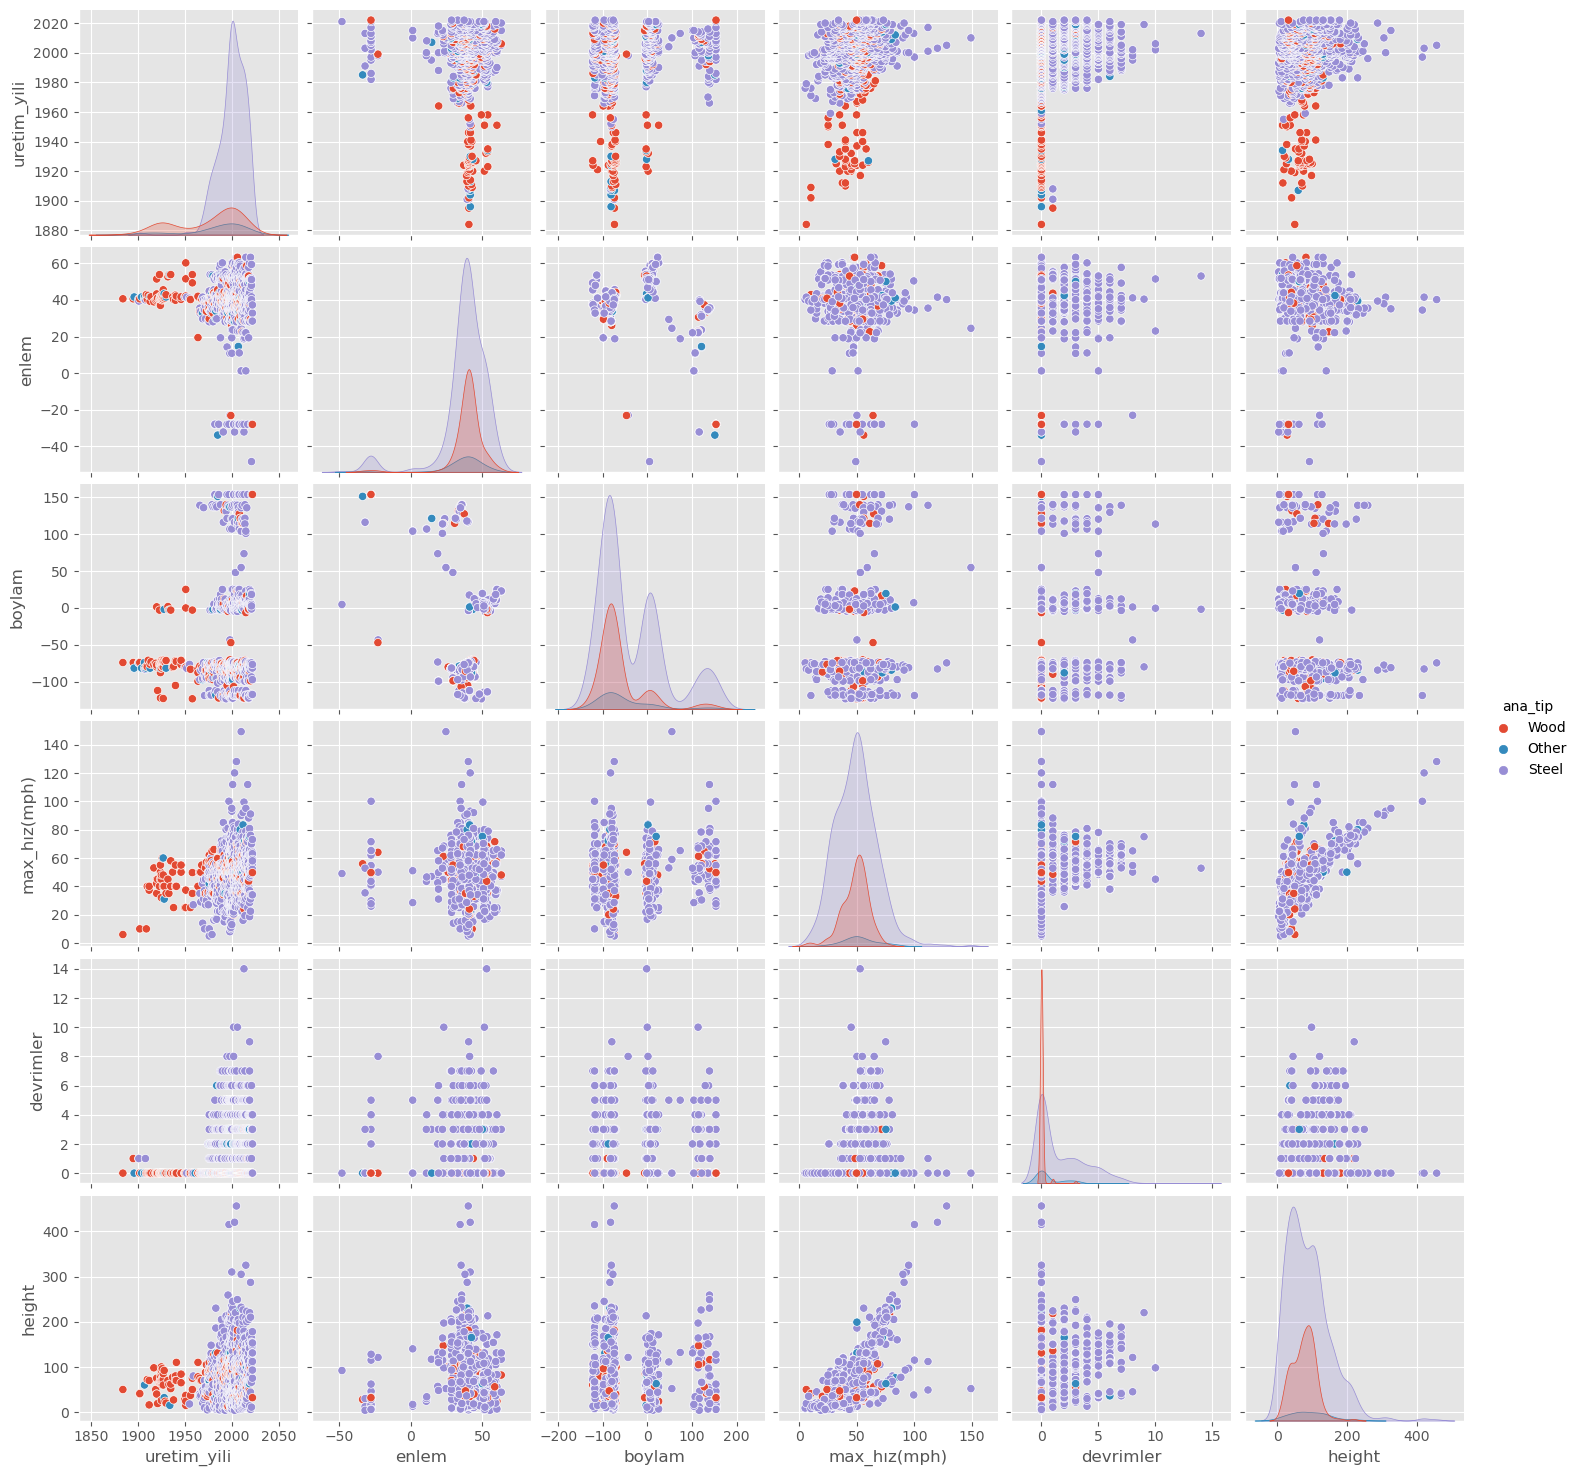

In [137]:
sns.pairplot(df , hue="ana_tip") 
# karşılaştırmak istediğim özellikleri girdim istersem tüm df i de görselleştirebilirim

In [142]:
df.columns

Index(['isim', 'yer', 'durum', 'uretic_sirket', 'uretim_yili', 'enlem',
       'boylam', 'ana_tip', 'acilis_tarihi', 'max_hız(mph)', 'devrimler',
       'height'],
      dtype='object')

<Axes: >

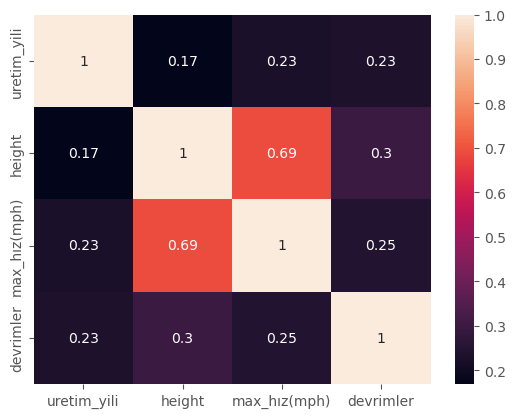

In [143]:
sns.heatmap(df[["uretim_yili","height","max_hız(mph)","devrimler"]].corr(numeric_only=True), annot=True)

yükseklik ve hız arasında güçlü bir pozitif korelasyon var. kalanlar çok da ilişkili gibi değil.

Bundan sonra veri setini kullanarak merak ettiğimiz sorulara cevap arayabiliriz. Değişkenlerin aralarındaki ilişkileri biliyoruz, değişkenlerin dağılımlarını i sıklıklarını biliyoruz. belki çarpıklık testi falan da yapabilirdik ama genel olarak elimizdeki veriye hakimiz. 